# YOLO v9 Overview
YOLOv9 is a powerful computer vision model for object detection, developed by Chien-Yao Wang, I-Hau Yeh, and Hong-Yuan Mark Liao. It introduces the YOLOv9 and GELAN architectures, accessible through the accompanying Python repository. While YOLOv9 excels at object detection, it currently does not support segmentation, classification, or other related tasks ( 10 Mar 2024).

This solution fundamentally relies on two groundbreaking innovations: Programmable Gradient Information (PGI) and the lightweight Generalized Efficient Layer Aggregation Network (GELAN) architecture.

Programmable Gradient Information (PGI) combats information loss in deep neural networks. PGI ensures complete input data is used in objective function calculations, enabling accurate gradient generation for network weight updates.

The Generalized Efficient Layer Aggregation Network (GELAN) leverages gradient path planning to improve parameter utilization. This lightweight architecture, particularly when integrated with PGI, yields superior object detection performance on the MS COCO dataset compared to existing state-of-the-art approaches.

Exceptional Performance: The utilization of GELAN and PGI in object detection tasks based on the MS COCO dataset has demonstrated superior results compared to alternative approaches. Notably, it excels in parameter optimization and accuracy, surpassing even models pre-trained on extensive datasets

**DataSet**
- [DataSet](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection)

**Repository**
* [Repository](https://github.com/WongKinYiu/yolov9/tree/main)

**Paper**
* [Paper](https://arxiv.org/abs/2402.13616)

# Library Import

In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

# Review Data

In [13]:
# This is a label from the annotation folder. This label is .xml format.
with open("/kaggle/input/face-mask-detection/annotations/maksssksksss0.xml") as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

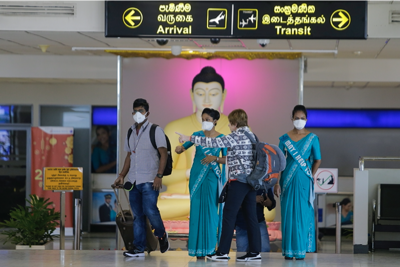

In [6]:
# This is image from the images folder.
Image.open("/kaggle/input/face-mask-detection/images/maksssksksss113.png")

# Dataset Preparation
This chapter has two chapters.In the first chapter, Firstly I translate the .xml format to the .txt format and create labels folder. This folder has the .txt format labels. Second I review new label types.In the second chapter, I prepare the train data.

## Translate ".xml" format to ".txt" format

In [14]:
# The functions are about translating label data.
def xml_to_yolo_bbox(bbox, w, h):
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2 ) / h
    
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    
    return [x_center, y_center, width, height]

def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center, width, height
    w_half_len = (bbox[2] + w) / 2
    h_half_len = (bbox[3] + h) / 2
    
    xmin = int((bbox[0] + w) - w_half_len)
    ymin = int((bbox[1] + h) - h_half_len)
    xmax = int((bbox[0] + w) + w_half_len)
    ymax = int((bbox[1] + h) + h_half_len)
    
    return [xmin, ymin, xmax, ymax]

In [15]:
# Create .txt label data.
classes = []

input_dir = "/kaggle/input/face-mask-detection/annotations"
output_dir = "/kaggle/working/labels"
image_dir = "/kaggle/input/face-mask-detection/images"

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

files = glob.glob(os.path.join(input_dir, "*.xml"))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
        print(f"{filename} image does not exist")
        continue
    
    result = []
    
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)
    
    for obj in root.findall("object"):
        label = obj.find("name").text
        
        if label not in classes:
            classes.append(label)
        
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")
    
    if result:
        
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding = "utf-8") as f:
            f.write("\n".join(result))
            
with open(f"{output_dir}/classes.txt", "w", encoding = "utf-8") as f:
    f.write(json.dumps(classes))

In [9]:
# Labels
with open(f"{output_dir}/classes.txt") as f:
    contents = f.read()
    print(contents)

["with_mask", "mask_weared_incorrect", "without_mask"]


In [10]:
# .xml format
with open("/kaggle/input/face-mask-detection/annotations/maksssksksss334.xml") as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss334.png</filename>
    <size>
        <width>400</width>
        <height>312</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>96</xmin>
            <ymin>74</ymin>
            <xmax>136</xmax>
            <ymax>127</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>193</xmin>
            <ymin>100</ymin>
            <xmax>234</xmax>
            <ymax>146</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</trunc

In [11]:
# .txt format
with open("/kaggle/working/labels/maksssksksss334.txt") as f:
    contents = f.read()
    print(contents)

0 0.29 0.32211538461538464 0.1 0.16987179487179488
0 0.53375 0.3942307692307692 0.1025 0.14743589743589744
0 0.705 0.41025641025641024 0.115 0.14743589743589744
2 0.87625 0.40064102564102566 0.0825 0.12179487179487179


In [12]:
annotation_count = len(os.listdir("/kaggle/input/face-mask-detection/annotations"))
labels_count = len(os.listdir("/kaggle/working/labels"))
print(f"Annotation Counts: {annotation_count}")
print(f"Lables Counts: {labels_count}")

Annotation Counts: 853
Lables Counts: 854


## Preparing Training Data

In [16]:
# Create a folder of train dataset
if not os.path.isfile("/kaggle/working/data"):
    os.mkdir('/kaggle/working/data')
    os.mkdir('/kaggle/working/data/train')
    os.mkdir('/kaggle/working/data/val')
    os.mkdir('/kaggle/working/data/test')
    os.mkdir('/kaggle/working/data/train/images')
    os.mkdir('/kaggle/working/data/train/labels')
    os.mkdir('/kaggle/working/data/test/images')
    os.mkdir('/kaggle/working/data/test/labels')
    os.mkdir('/kaggle/working/data/val/images')
    os.mkdir('/kaggle/working/data/val/labels')

In [17]:
# Material is the names of images in the images folder.
metarial = []
for i in os.listdir("/kaggle/input/face-mask-detection/images"):
    str = i[:-4]
    metarial.append(str)

In [18]:
metarial[0:10]

['maksssksksss810',
 'maksssksksss848',
 'maksssksksss145',
 'maksssksksss825',
 'maksssksksss30',
 'maksssksksss323',
 'maksssksksss805',
 'maksssksksss613',
 'maksssksksss315',
 'maksssksksss295']

In [21]:
print("Sum of image: ", len(metarial))
train_size = int(len(metarial) * 0.7)
test_size = int(len(metarial) * 0.15)
val_size = int(len(metarial) * 0.15)
print("Sum of the train size: ", train_size)
print("Sum of the test size: ", test_size)
print("Sum of the val size: ", val_size)

Sum of image:  853
Sum of the train size:  597
Sum of the test size:  127
Sum of the val size:  127


In [19]:
# The function is create train_data for YoloV9.
def preparinbdata(main_txt_file, main_img_file, train_size, test_size, val_size):
    for i in range(0, train_size):
        source_txt = main_txt_file + "/" + metarial[i] + ".txt"
        source_img = main_img_file + "/" + metarial[i] + ".png"
        
        mstring = metarial[i]
        train_destination_txt = "/kaggle/working/data/train/labels" + "/" + metarial[i] + ".txt"
        train_destination_png = "/kaggle/working/data/train/images" + "/" + metarial[i] + ".png"
        
        shutil.copy(source_txt, train_destination_txt)
        shutil.copy(source_img, train_destination_png)
        
    for l in range(train_size , train_size + test_size):

        source_txt = main_txt_file + "/" + metarial[l] + ".txt"
        source_img = main_img_file + "/" + metarial[l] + ".png"

        mstring = metarial[l]
        test_destination_txt = "/kaggle/working/data/test/labels" + "/" + metarial[l] + ".txt"
        test_destination_png = "/kaggle/working/data/test/images" + "/" + metarial[l] + ".png"

        shutil.copy(source_txt, test_destination_txt)
        shutil.copy(source_img, test_destination_png)

        #metarial.remove(file_name[:-4])


    for n in range(train_size + test_size , train_size + test_size + val_size):

        source_txt = main_txt_file + "/" + metarial[n] + ".txt"
        source_img = main_img_file + "/" + metarial[n] + ".png"

        mstring = metarial[n]
        val_destination_txt = "/kaggle/working/data/val/labels" + "/" + metarial[n] + ".txt"
        val_destination_png = "/kaggle/working/data/val/images" + "/" + metarial[n] + ".png"

        shutil.copy(source_txt, val_destination_txt)
        shutil.copy(source_img, val_destination_png)
        

In [22]:
#preparinbdata("/kaggle/working/labels", "/kaggle/input/face-mask-detection/images", 603, 150, 100)
preparinbdata(main_txt_file = "/kaggle/working/labels", 
              main_img_file = "/kaggle/input/face-mask-detection/images",
              train_size = train_size,
              test_size = test_size, 
              val_size = val_size)

In [26]:
# Create the data.yaml. I am going to use it on the train with yolov9.
yaml_text = """train: /kaggle/working/data/train/images/
val: /kaggle/working/data/val/images/

nc: 3
names: ["with_mask", "mask_weared_incorrect", "without_mask"]"""

with open("/kaggle/working/data/data.yaml", 'w') as file:
    file.write(yaml_text)

In [27]:
with open("/kaggle/working/data/data.yaml") as f:
    contents = f.read()
    print(contents)

train: /kaggle/working/data/train/images/
val: /kaggle/working/data/val/images/

nc: 3
names: ["with_mask", "mask_weared_incorrect", "without_mask"]


# Model Development
In this chapter, Firstly I download the yolov9 Github repository. Second I install the requirements about YoloV9. Third I start the train with YoloV9.

In [8]:
# Download Github rep.
!git clone https://github.com/WongKinYiu/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 325 (delta 158), reused 155 (delta 155), pack-reused 109
Receiving objects: 100% (325/325), 2.23 MiB | 13.38 MiB/s, done.
Resolving deltas: 100% (165/165), done.


In [38]:
# İnstall the req.
!pip install -r /kaggle/working/yolov9/requirements.txt -q

In [23]:
# Train with YoloV9
"""
workers --> max dataloader workers (per RANK in DDP mode)
device --> cuda device, i.e. 0 or 0,1,2,3 or cpu
batch --> total batch size for all GPUs, -1 for autobatch
epochs --> total training epochs
data --> dataset.yaml path
img --> train, val image size (pixels)
cfg --> model.yaml path
weights --> initial weights path
name --> save to project/name
hyp --> hyperparameters path

**This parameters is my project parameters. You can make changes for your project.**
"""

!python /kaggle/working/yolov9/train_dual.py \
--workers 8 --device 0,1 --batch 16 --epochs 50 --min-items 0 --close-mosaic 15\
--data /kaggle/working/data/data.yaml \
--img 640 --cfg /kaggle/working/yolov9/models/detect/yolov9-c.yaml \
--weights '' --name yolov9-c --hyp /kaggle/working/yolov9/data/hyps/hyp.scratch-high.yaml 

2024-05-12 18:21:40.788930: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 18:21:40.789069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 18:21:41.085841: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train_dual: weights=, cfg=/kaggle/working/yolov9/models/detect/yolov9-c.yaml, data=/kaggle/working/data/data.yaml, hyp=/kaggle/working/yolov9/data/hyps/hyp.scratch-hig

# Model Evaluation

**Validation Results:** After validation, the model achieved the following performance metrics:
* **Precision (P):** 70.5%
* **Recall (R):** 73.2%
* **mAP50 (mean Average Precision at IoU 0.5):** 74.1%

These metrics are computed across all classes and also individually for each class:
* **with_mask:** Precision: 86.7%, Recall: 86.0%, mAP50: 90.8%
* **mask_weared_incorrect:** Precision: 58.5%, Recall: 54.2%, mAP50: 53.9%
* **without_mask:** Precision: 66.3%, Recall: 79.5%, mAP50: 77.5%

Overall, model has achieved decent performance, especially in detecting people with masks. However, there might be some room for improvement, particularly in detecting instances of people with incorrectly worn masks. Fine-tuning hyperparameters or dataset augmentation techniques could potentially enhance the model's performance further.

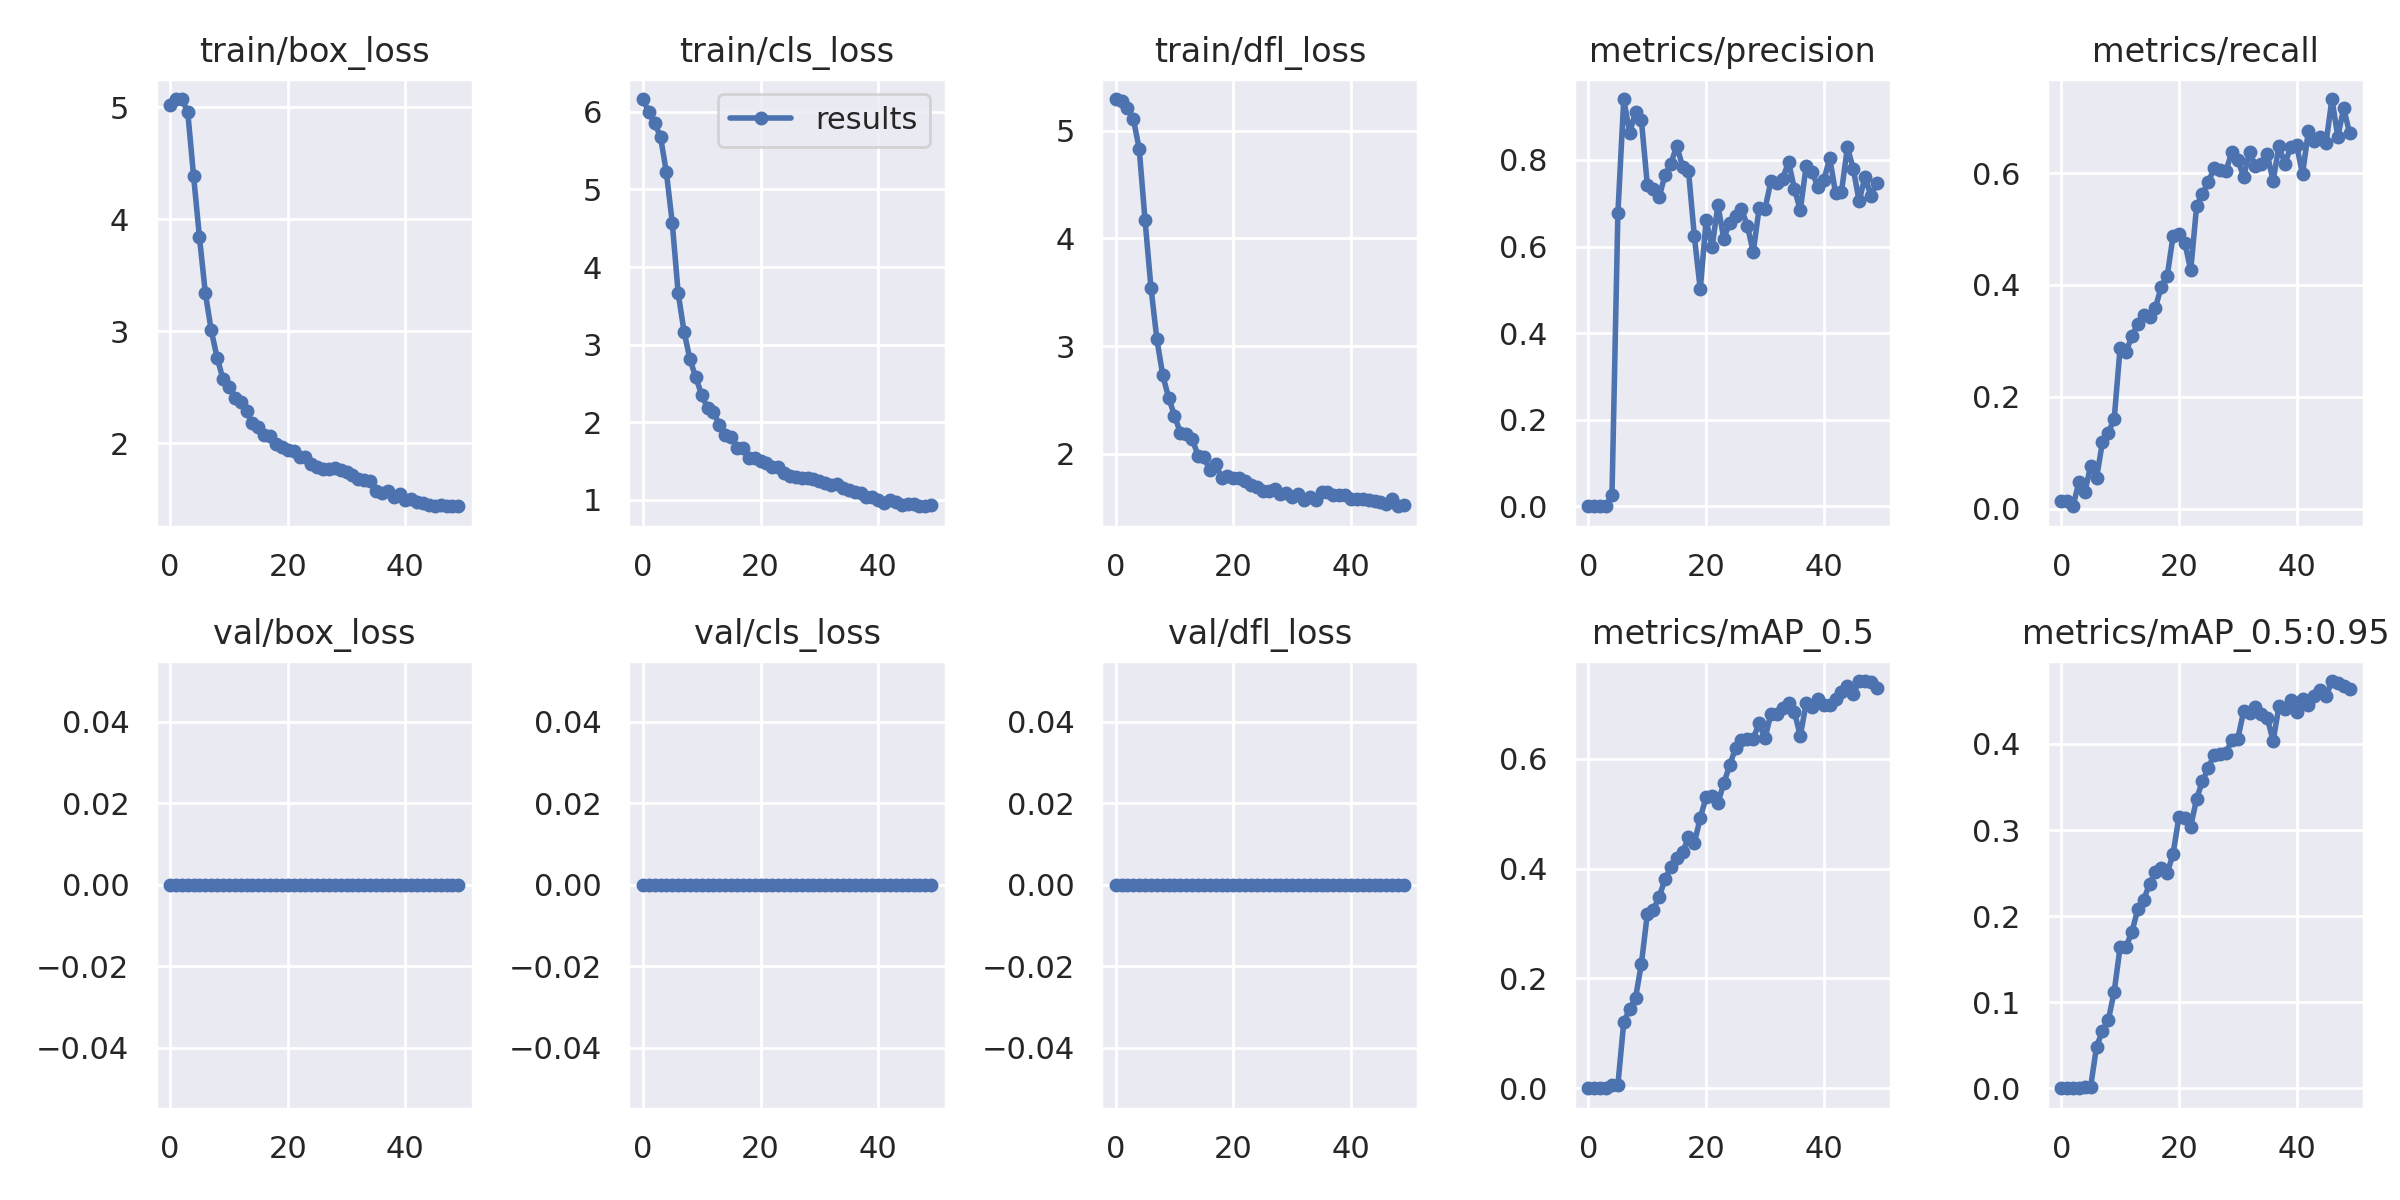

In [25]:
Image.open("/kaggle/working/yolov9/runs/train/yolov9-c/results.png")

As seen in the picture above, there were decreases in loss values and we were expecting these. Only the val_loss values remain constant, this is because the val_loss calculation is currently turned off when using train_dual.py. As I expected, there were increases in metrics. In training with the YoloV9 model, I expect a decrease in loss values and an increase in metrics. If the opposite occurs, I predict that something is wrong with the model.

# Detection
In this chapter, I am going to use the result of the model and detect my classes in images.

In [28]:
"""
**Detect**

weights --> model path or triton URL
conf --> confidence threshold
source --> file/dir/URL/glob/screen/0(webcam)
device --> cuda device, i.e. 0 or 0,1,2,3 or cpu
"""
!python /kaggle/working/yolov9/detect.py --weights /kaggle/working/yolov9/runs/train/yolov9-c/weights/best.pt \
--conf 0.1 --source /kaggle/working/data/test/images/maksssksksss790.png --device 0,1

detect: weights=['/kaggle/working/yolov9/runs/train/yolov9-c/weights/best.pt'], source=/kaggle/working/data/test/images/maksssksksss790.png, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0,1, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                             CUDA:1 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50963250 parameters, 0 gradients, 237.7 GFLOPs
image 1/1 /kaggle/working/data/test/images/maksssksksss790.png: 640x512 1 with_mask, 191.1ms
Speed: 0.5ms pre-process, 191.1ms inference, 553.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolo

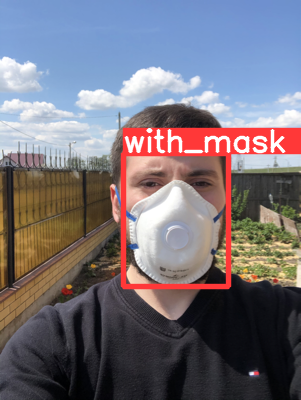

In [31]:
# Result of Detect
Image.open("/kaggle/working/yolov9/runs/detect/exp2/maksssksksss790.png")

In [34]:
!python /kaggle/working/yolov9/detect.py --weights /kaggle/working/yolov9/runs/train/yolov9-c/weights/best.pt \
--conf 0.1 --source /kaggle/working/data/test/images/maksssksksss350.png --device 0,1

detect: weights=['/kaggle/working/yolov9/runs/train/yolov9-c/weights/best.pt'], source=/kaggle/working/data/test/images/maksssksksss350.png, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0,1, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                             CUDA:1 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50963250 parameters, 0 gradients, 237.7 GFLOPs
image 1/1 /kaggle/working/data/test/images/maksssksksss350.png: 448x640 2 with_masks, 182.5ms
Speed: 0.5ms pre-process, 182.5ms inference, 656.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to yol

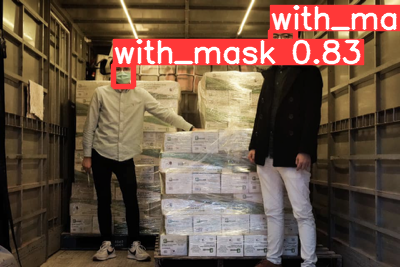

In [35]:
# Result of Detect
Image.open("/kaggle/working/yolov9/runs/detect/exp4/maksssksksss350.png")

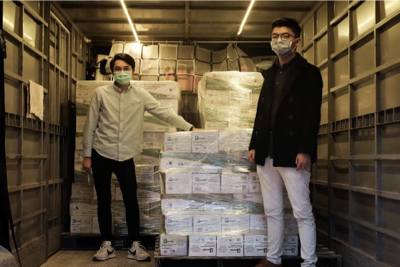

In [36]:
# Since the face of the man on the right is not visible, I wanted to share the original picture.
Image.open("/kaggle/input/face-mask-detection/images/maksssksksss350.png")

In [37]:
!wget "https://onecms-res.cloudinary.com/image/upload/s--XV7DHKzY--/c_fill,g_auto,h_468,w_830/f_auto,q_auto/people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A"

--2024-05-12 19:15:01--  https://onecms-res.cloudinary.com/image/upload/s--XV7DHKzY--/c_fill,g_auto,h_468,w_830/f_auto,q_auto/people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A
Resolving onecms-res.cloudinary.com (onecms-res.cloudinary.com)... 23.56.220.83, 2600:1418:a000:48a::523, 2600:1418:a000:481::523
Connecting to onecms-res.cloudinary.com (onecms-res.cloudinary.com)|23.56.220.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44288 (43K) [image/jpeg]
Saving to: 'people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A'

people-wearing-mask 100%[===================>]  43.25K   125KB/s    in 0.3s    

2024-05-12 19:15:02 (125 KB/s) - 'people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A' saved [44288/44288]



In [38]:
os.rename("/kaggle/working/people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A", "image.jpg")

In [41]:
!python /kaggle/working/yolov9/detect.py --weights /kaggle/working/yolov9/runs/train/yolov9-c/weights/best.pt \
--conf 0.1 --source /kaggle/working/image.jpg --device 0,1

detect: weights=['/kaggle/working/yolov9/runs/train/yolov9-c/weights/best.pt'], source=/kaggle/working/image.jpg, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0,1, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                             CUDA:1 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50963250 parameters, 0 gradients, 237.7 GFLOPs
image 1/1 /kaggle/working/image.jpg: 384x640 3 with_masks, 4 without_masks, 177.7ms
Speed: 0.4ms pre-process, 177.7ms inference, 564.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov9/runs/detect/exp6


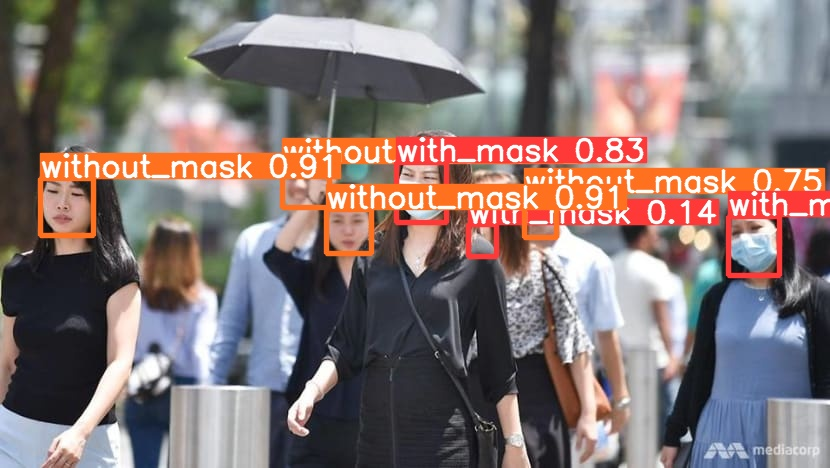

In [42]:
# Result of Detect
Image.open("/kaggle/working/yolov9/runs/detect/exp6/image.jpg")

# Source
* https://github.com/WongKinYiu/yolov9/tree/main
* https://medium.com/@tententgc/yolov9-faster-and-more-accurate-object-detection-337a7ca29676
* https://www.kaggle.com/datasets/andrewmvd/face-mask-detection